Importing Libraries

In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data and Data Preprocessing

In [66]:
data=pd.read_excel('customer_churn_large_dataset.xlsx')

In [67]:
df=data.copy()
df.shape

(100000, 9)

In [68]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [70]:
#with mean and Standard Deviation it seems ther are no outliers but we will check it later on once more
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [71]:
#There is not null values in the dataset
df.isnull().sum().sort_values(ascending=False)

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [72]:
#There is no duplicate rows
df.duplicated().sum()

0

In [73]:
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

Since there are some columns which is in object datatype I will convert it into numbers using LabelEncoder

In [74]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [75]:
lr=LabelEncoder()
df['Gender']=lr.fit_transform(df['Gender'])
df['Location']=lr.fit_transform(df['Location'])

In [76]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,1,2,17,73.36,236,0
1,2,Customer_2,62,0,4,1,48.76,172,0
2,3,Customer_3,24,0,2,5,85.47,460,0
3,4,Customer_4,36,0,3,3,97.94,297,1
4,5,Customer_5,46,0,3,19,58.14,266,0


In [77]:
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [78]:
df=df.drop(['Name','CustomerID'],axis=1)

Data is balanced

In [79]:
print(df.Churn.value_counts())
print("---------------------")
print(df.Gender.value_counts())
print("---------------------")
print(df.Location.value_counts())

Churn
0    50221
1    49779
Name: count, dtype: int64
---------------------
Gender
0    50216
1    49784
Name: count, dtype: int64
---------------------
Location
1    20157
2    20041
3    20031
0    19958
4    19813
Name: count, dtype: int64


Data Visualisation

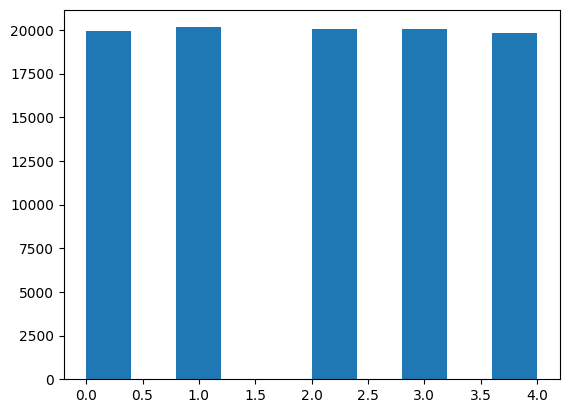

In [80]:
plt.hist(df['Location'])
plt.show()

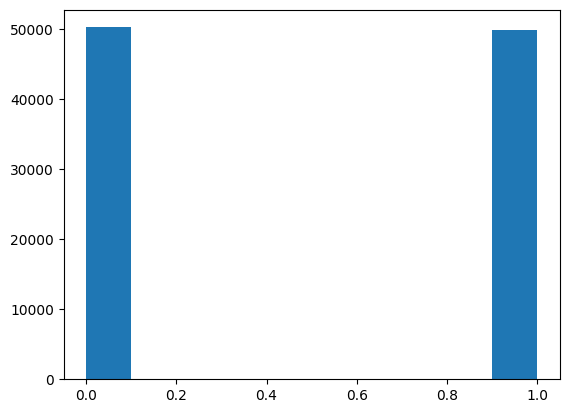

In [81]:
plt.hist(df['Churn'])
plt.show()

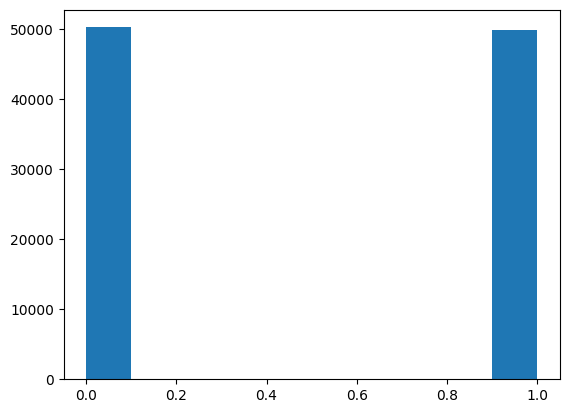

In [82]:
plt.hist(df['Gender'])
plt.show()

Featur Engineering

Dividing ages into groups and converting into labels

In [83]:
# Define age groups
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-100']

# Create age groups column
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [84]:
df['Age_Group']=lr.fit_transform(df['Age_Group'])

(array([ 1839.,     0., 22584.,     0., 18864.,     0., 18932.,     0.,
        18966., 18815.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

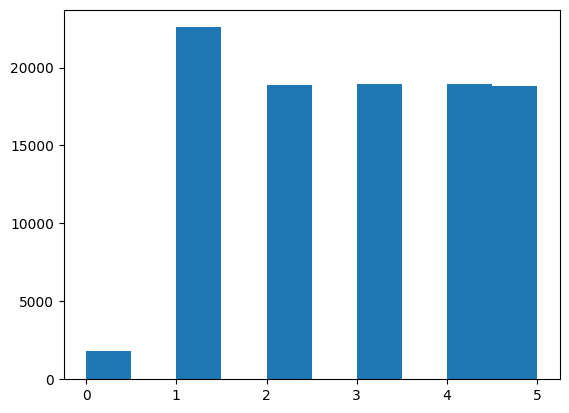

In [85]:
plt.hist(df['Age_Group'])

In [86]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group
0,63,1,2,17,73.36,236,0,5
1,62,0,4,1,48.76,172,0,5
2,24,0,2,5,85.47,460,0,1
3,36,0,3,3,97.94,297,1,2
4,46,0,3,19,58.14,266,0,3


In [89]:
#Using correlation matrix to find the relationship between different columns with churn column and using heatmap to visualize it
df=df.drop(['Age'],axis=1)
corrM=df.corr()
corrM

,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group
Gender,1.000000,-0.003314,0.000320,0.002239,-0.001385,0.002121,0.001442
Location,-0.003314,1.000000,-0.001768,0.003716,0.002834,0.006405,-0.005110
Subscription_Length_Months,0.000320,-0.001768,1.000000,-0.005294,-0.002203,0.002328,0.002077
Monthly_Bill,0.002239,0.003716,-0.005294,1.000000,0.003187,-0.000211,0.000907
Total_Usage_GB,-0.001385,0.002834,-0.002203,0.003187,1.000000,-0.002842,0.002332
Churn,0.002121,0.006405,0.002328,-0.000211,-0.002842,1.000000,0.001988
Age_Group,0.001442,-0.005110,0.002077,0.000907,0.002332,0.001988,1.000000


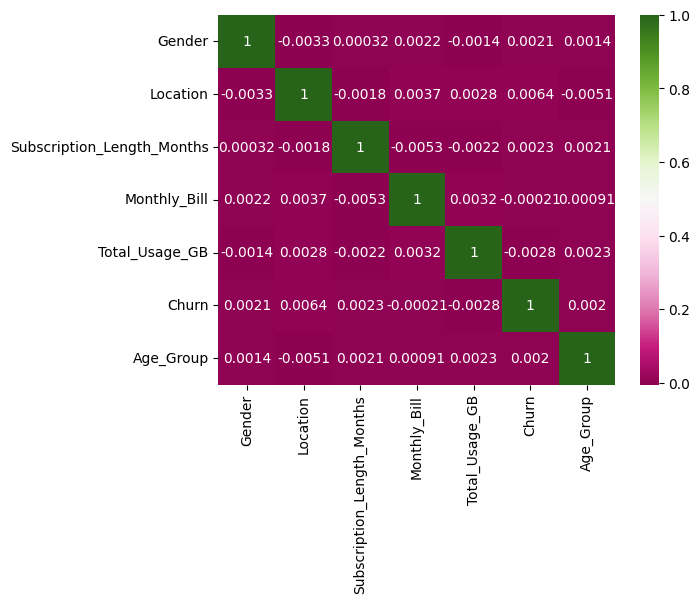

In [90]:
sns.heatmap(corrM,cmap='PiYG',annot=True)
plt.show()

To make sure there is no outlier in the dataset I am using boxplot. There is no outliers in dataset

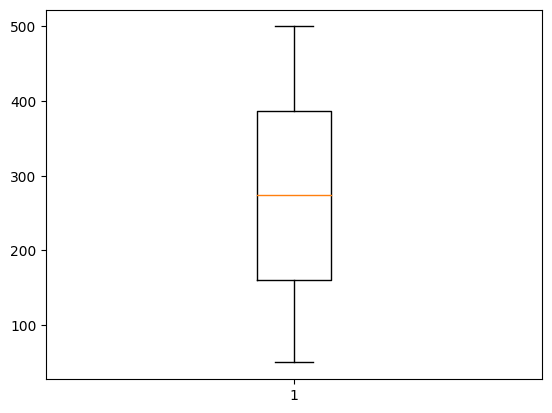

In [91]:
plt.boxplot(df['Total_Usage_GB'])
plt.show()

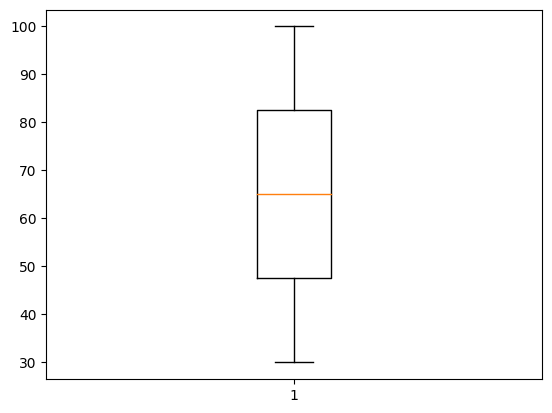

In [92]:
plt.boxplot(df['Monthly_Bill'])
plt.show()

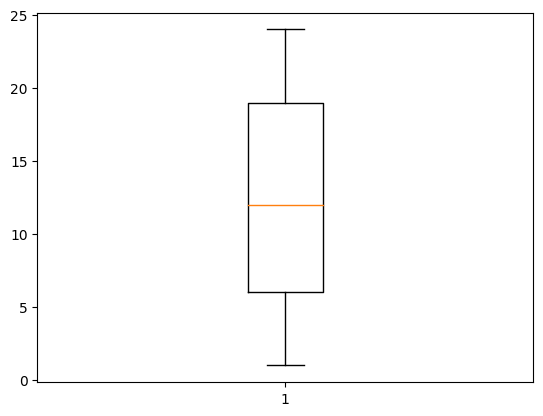

In [93]:
plt.boxplot(df['Subscription_Length_Months'])
plt.show()

In [95]:
# df=df.drop(['Age','CustomerID'],axis=1)

In [96]:
df['Age_Group']=lr.fit_transform(df['Age_Group'])

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      100000 non-null  int32  
 1   Location                    100000 non-null  int32  
 2   Subscription_Length_Months  100000 non-null  int64  
 3   Monthly_Bill                100000 non-null  float64
 4   Total_Usage_GB              100000 non-null  int64  
 5   Churn                       100000 non-null  int64  
 6   Age_Group                   100000 non-null  int64  
dtypes: float64(1), int32(2), int64(4)
memory usage: 4.6 MB


Model Building

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x=df.drop(['Churn'],axis=1)
y=df["Churn"]
x.shape,y.shape

((100000, 6), (100000,))

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [102]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((70000, 6), (70000,), (30000, 6), (30000,))

In [103]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [104]:
rfc=RandomForestClassifier()
lr=LogisticRegression(penalty='l2', C=1.0)
dtc=DecisionTreeClassifier()
nb=GaussianNB()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()

In [105]:
xgb.fit(x_train,y_train)
print("Train Accuracy")
print(xgb.score(x_train,y_train))
print("Test Accuracy")
print(xgb.score(x_test,y_test))

Train Accuracy
0.6491571428571429
Test Accuracy
0.5039333333333333


In [106]:
prediction=xgb.predict(x_test)
prediction[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [107]:
y_test[:10]

75721    0
80184    0
19864    0
76699    1
92991    0
76434    1
84004    0
80917    0
60767    0
50074    1
Name: Churn, dtype: int64

In [108]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,prediction))
print('--------------------------------------------------------------')
print(accuracy_score(y_test,prediction))
# print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51     15152
           1       0.50      0.49      0.50     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

--------------------------------------------------------------
0.5039333333333333


Trying Neural Network

In [295]:
import tensorflow as tf
from tensorflow import keras  

In [296]:
model=keras.Sequential([
    keras.layers.Dense(128,input_shape=(17,),activation='relu'),
    keras.layers.Dense(128,activation='relu'),
#     keras.layers.BatchNormalisation(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    
])

In [297]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [298]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
2344/2344 [==============================] - 3s 984us/step - loss: 22.1999 - accuracy: 0.5024
Epoch 2/10
2344/2344 [==============================] - 2s 946us/step - loss: 1.7473 - accuracy: 0.4991
Epoch 3/10
2344/2344 [==============================] - 2s 993us/step - loss: 0.9793 - accuracy: 0.5011
Epoch 4/10
2344/2344 [==============================] - 2s 967us/step - loss: 0.6936 - accuracy: 0.4997
Epoch 5/10
2344/2344 [==============================] - 2s 990us/step - loss: 0.6935 - accuracy: 0.5008
Epoch 6/10
2344/2344 [==============================] - 2s 992us/step - loss: 0.6932 - accuracy: 0.4995
Epoch 7/10
2344/2344 [==============================] - 2s 998us/step - loss: 0.7081 - accuracy: 0.4994
Epoch 8/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6996 - accuracy: 0.5004
Epoch 9/10
2344/2344 [==============================] - 2s 1ms/step - loss: 0.6932 - accuracy: 0.4979
Epoch 10/10
2344/2344 [==============================] - 3s 1ms/ste

In [299]:
prediction=model.predict(x_test)
prediction[:10]

782/782 [==============================] - 1s 603us/step


array([[0.49892747],
       [0.49892747],
       [0.49892747],
       [0.49892747],
       [0.49892747],
       [0.49892747],
       [0.49892747],
       [0.49892747],
       [0.49892747],
       [0.49892747]], dtype=float32)

In [300]:
y_pred=[]
for i in prediction:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [301]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12578
           1       0.00      0.00      0.00     12422

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.34     25000

--------------------------------------------------------------
0.50312


C:\Users\brago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\brago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\brago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [77]:
model.evaluate(x_test,y_test)

2813/2813 [==============================] - 3s 1ms/step - loss: 0.7959 - accuracy: 0.4975


[0.7959047555923462, 0.49754443764686584]

Cross Validation On XGBoost and RandomForest

In [111]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(xgb, x_train,y_train,cv=5)
print("-------------------------")
print("XGBoost Scores")
print(score)

-------------------------
XGBoost Scores
[0.49864286 0.50392857 0.49771429 0.50564286 0.50392857]


In [112]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),x_train,y_train, cv=5)
print("-------------------------")
print("Random Forest Scores")
print(scores1)

-------------------------
Random Forest Scores
[0.50364286 0.49842857 0.50214286 0.50178571 0.49807143]


In [113]:
# df = pd.get_dummies(df, columns = ['Location', 'Gender','Age_Group'])
# df.info()

In [114]:
# df["Age_Group_0"] = df["Age_Group_0"].astype(int)
# df["Age_Group_1"] = df["Age_Group_1"].astype(int)
# df["Age_Group_2"] = df["Age_Group_2"].astype(int)
# df["Age_Group_3"] = df["Age_Group_3"].astype(int)
# df["Age_Group_4"] = df["Age_Group_4"].astype(int)
# df["Age_Group_5"] = df["Age_Group_5"].astype(int)


# df["Location_0"] = df["Location_0"].astype(int)
# df["Location_1"] = df["Location_1"].astype(int)
# df["Location_2"] = df["Location_2"].astype(int)
# df["Location_3"] = df["Location_3"].astype(int)
# df["Location_4"] = df["Location_4"].astype(int)

# df["Gender_0"] = df["Gender_0"].astype(int)
# df["Gender_1"] = df["Gender_1"].astype(int)

In [115]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Hyperparameter tuning on Random Forest using GridSearchCV and RandomSearchCV

In [105]:
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV

In [106]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [108]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=3,
                       n_estimators=50)


In [229]:
grid_search.score(x_train,y_train)

0.5067066666666666

In [ ]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

Featur Selection

In [376]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [377]:
sel.get_support()

array([False, False, False,  True,  True, False])

In [378]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

2

In [379]:
print(selected_feat)

Index(['Monthly_Bill', 'Total_Usage_GB'], dtype='object')


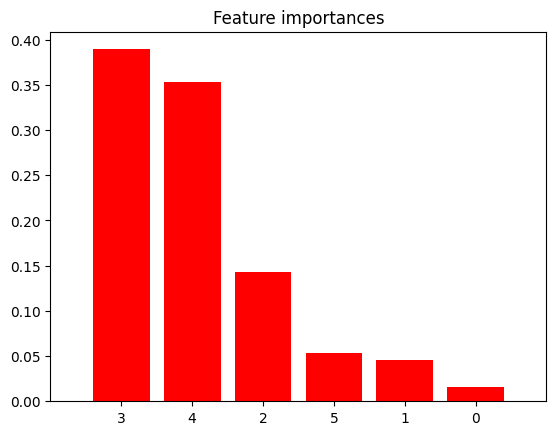

In [380]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

I have tried various models like 

Random Forest
Decision Tree
XGBoost

Naive Bayes
Logistic Regression
Neural Network

Naive Bayes, Logistic Regression and Neural Network didn't give me any better accuracy it was around 50-53% most of the time. For Logistic Regression I even used L2 regularization but there was no improvemnt in the accuracy.


As for Random Forest and Decision Tree keeps overfitting even arfet hyperparameter tuning and cross validation.

So, I choose to move with XGBoost as it gave me 64-68% accuracy on training set and 50-53% accuracy on testing set.




In [47]:
import pickle
with open('trained_model.pkl', 'wb') as model_file:
    pickle.dump(xgb, model_file)

In [ ]:
Builing a Streamlit App

In [58]:
import streamlit as st
import pickle
import numpy as np

# Load the trained model
with open('trained_model.pkl', 'rb') as model_file:
    trained_model = pickle.load(model_file)

st.title('Classification Model Predictor')


st.write("Note")
st.write(f"For gender Enter 1 for male and 0 for female")
st.write("For Location use this list ")
st.write("0---Chicago")
st.write("1---Houston")
st.write("2---Los_Angeles")
st.write("3---Miami")
st.write("4---New York")
# Get input features from the user
input_features = []

# Assuming you have a list of feature names
feature_names = ['Age', 'Gender', 'Location', 'Monthly_Bill','Total_Usage_GB','Subscription_Length_Months']
for feature_name in feature_names:
    value = st.number_input(f"Enter value for {feature_name}: ")
    input_features.append(value)

# Add a prediction button
if st.button('Predict'):
    # Convert input features to a NumPy array
    input_features_array = np.array(input_features).reshape(1, -1)

    # Make predictions using the loaded model
    predicted_class = trained_model.predict(input_features_array)

    st.write(f"Predicted class: {predicted_class[0]}")


2023-08-28 19:24:14.488 
  command:

    streamlit run C:\Users\brago\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
To run the code make a python file and copy paste the code 
Open terminal and write streamlit run app.py
or you can run the cell below

In [ ]:
import pickle
import numpy as np

# Load the trained model
with open('trained_model.pkl', 'rb') as model_file:
    trained_model = pickle.load(model_file)

# Get input features from the user
input_features = []

# Assuming you have a list of feature names
feature_names = ['Age', 'Gender', 'Location', 'Monthly_Bill','Total_Usage_GB','Subscription_Length_Months']

for feature_name in feature_names:
    value = float(input(f"Enter value for {feature_name}: "))
    input_features.append(value)

# Convert input features to a NumPy array
input_features_array = np.array(input_features).reshape(1, -1)

# Make predictions using the loaded model
predicted_class = trained_model.predict(input_features_array)

print(f"Predicted class: {predicted_class[0]}")


I have deployed the app using streamlit cloud.


Since I didn't have much time i couldn't get the time to do some feature engineering on ('Monthly_Bill','Total_Usage_GB','Subscription_Length_Months') these columns. I could have the resolved the issue of overfitting with RandomForest but due to time constraints ans large deliverable i couldn't able to do it.

But overall it was a interesting project to work on I got to learn a lot.